In [25]:
import cv2

import matplotlib.pyplot as plt
from torchvision import io
from torchvision.transforms.functional import to_pil_image

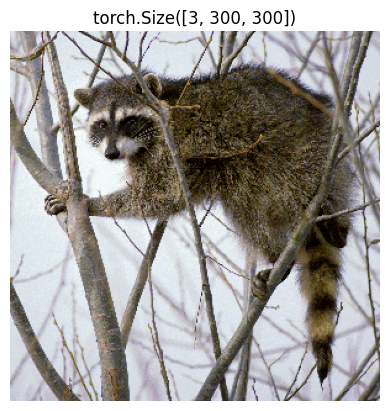

In [92]:
image = cv2.imread('racoon.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (300, 300))
image = torch.tensor(image)

image = image.permute(2, 0, 1)

plt.imshow(to_pil_image(image))
plt.title(image.shape)
plt.axis(False)
plt.show()

image shape:  torch.Size([3, 300, 300])
patches shape:  torch.Size([3, 3, 300, 100])


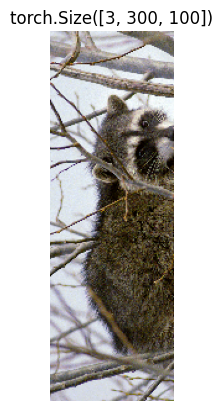

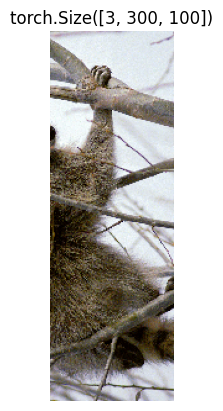

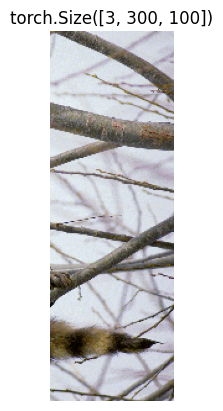

In [93]:
print('image shape: ', image.shape)
patches = image.unfold(1, 100, 100)
print('patches shape: ', patches.shape)

for i in range(3):
    sub_img = patches[:, i, :].squeeze()
    
    plt.imshow(to_pil_image(sub_img))
    plt.title(sub_img.shape)
    plt.axis(False)
    plt.show()

image shape:  torch.Size([3, 300, 300])
patches shape:  torch.Size([3, 300, 3, 100])


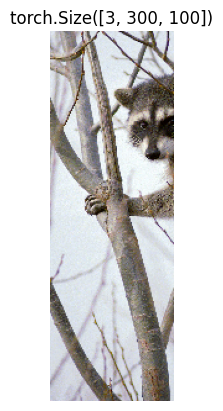

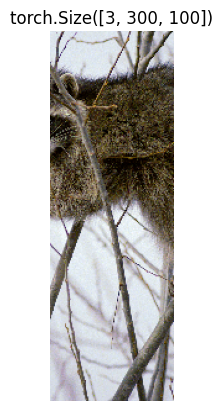

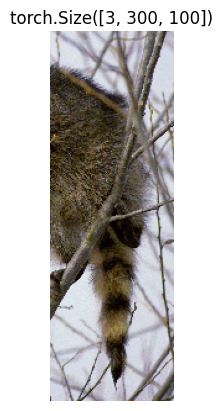

In [94]:
print('image shape: ', image.shape)
patches = image.unfold(2, 100, 100)
print('patches shape: ', patches.shape)

for i in range(3):
    sub_img = patches[:, :, i].squeeze()
    
    plt.imshow(to_pil_image(sub_img))
    plt.title(sub_img.shape)
    plt.axis(False)
    plt.show()

image shape:  torch.Size([3, 300, 300])
patches shape:  torch.Size([3, 3, 3, 100, 100])


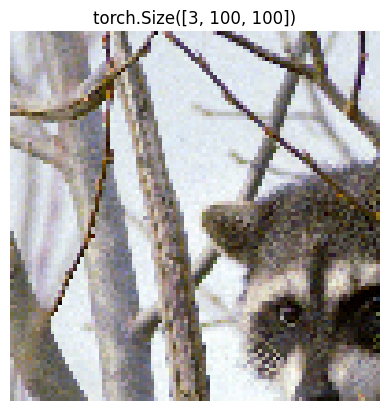

sub img shape: torch.Size([3, 100, 100])


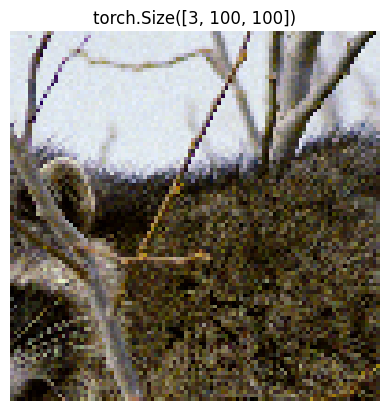

sub img shape: torch.Size([3, 100, 100])


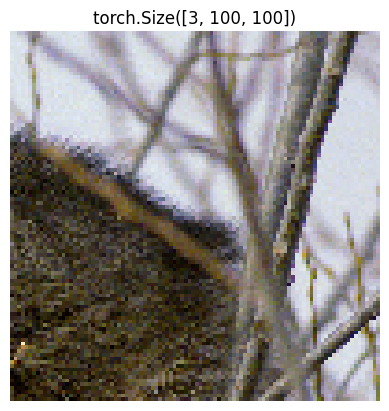

sub img shape: torch.Size([3, 100, 100])


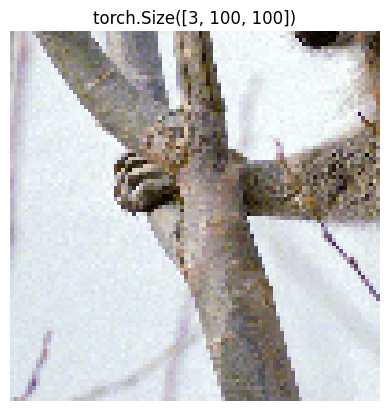

sub img shape: torch.Size([3, 100, 100])


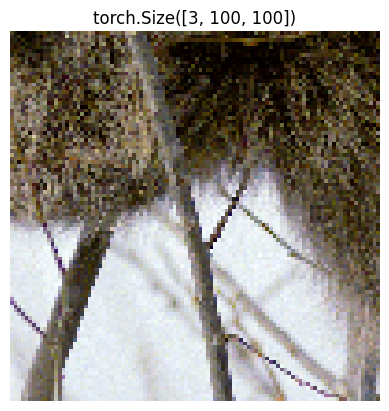

sub img shape: torch.Size([3, 100, 100])


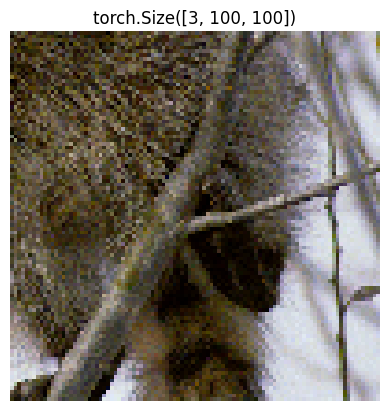

sub img shape: torch.Size([3, 100, 100])


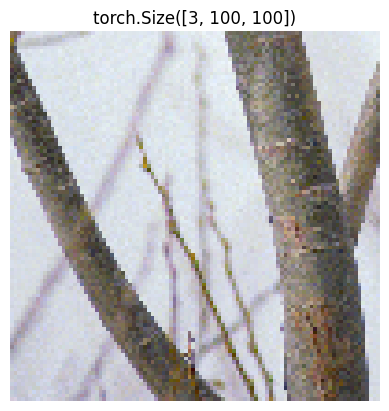

sub img shape: torch.Size([3, 100, 100])


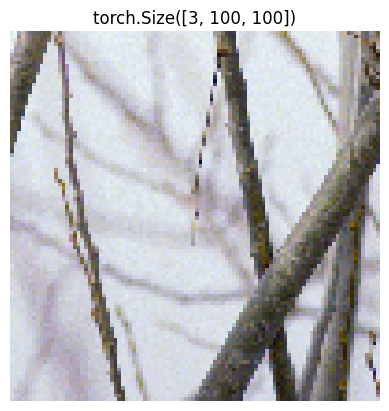

sub img shape: torch.Size([3, 100, 100])


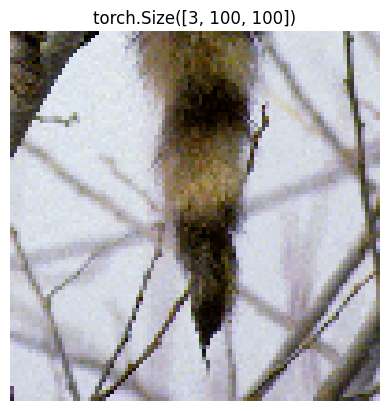

sub img shape: torch.Size([3, 100, 100])


In [91]:
print('image shape: ', image.shape)
patches = image.unfold(1, 100, 100).unfold(2, 100, 100)
print('patches shape: ', patches.shape)

for i in range(3):
    for j in range(3):
        sub_img = patches[:, i, j].squeeze()
        
        plt.imshow(to_pil_image(sub_img))
        plt.title(sub_img.shape)
        plt.axis(False)
        plt.show()

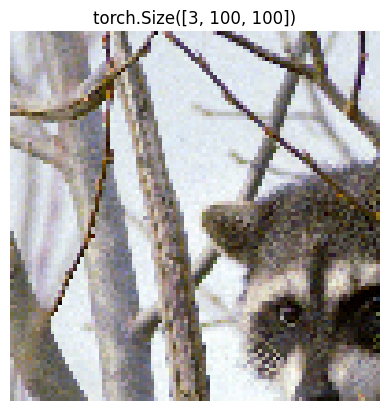

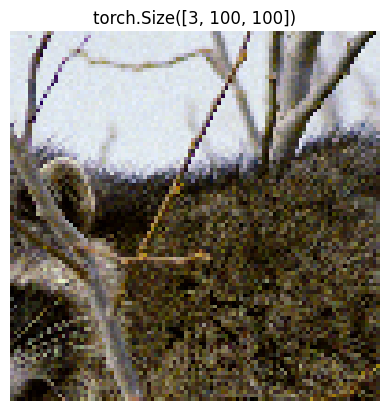

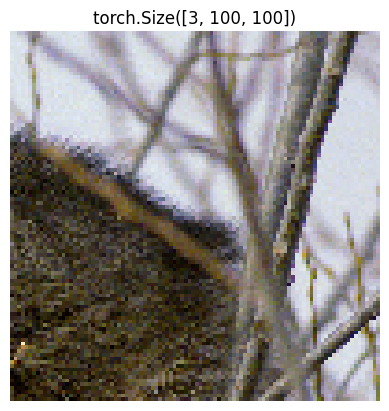

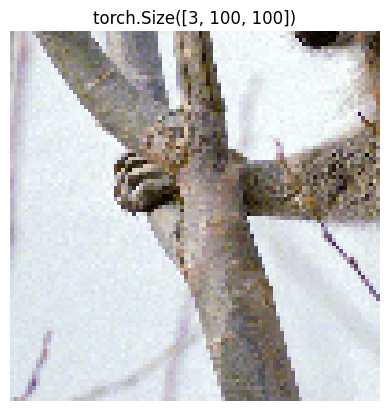

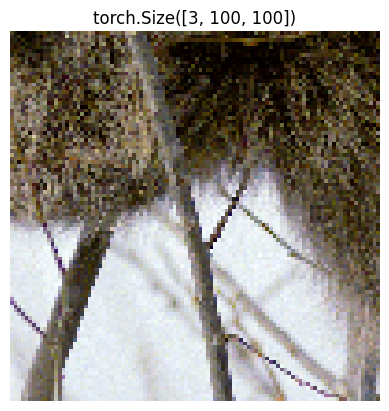

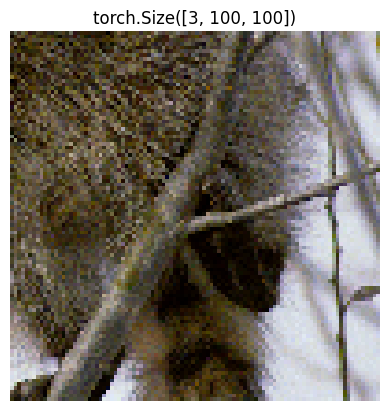

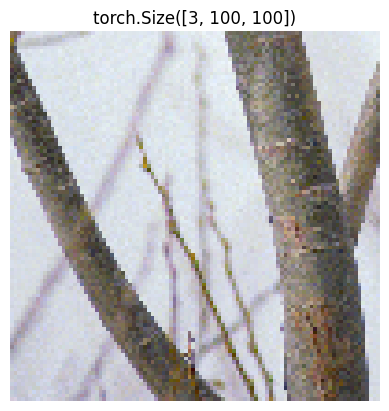

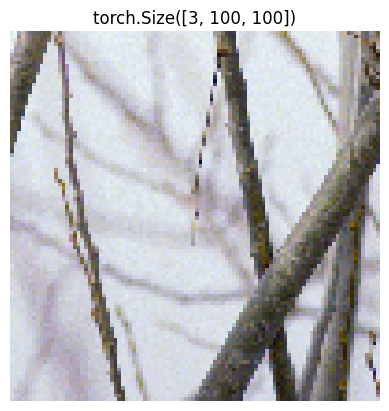

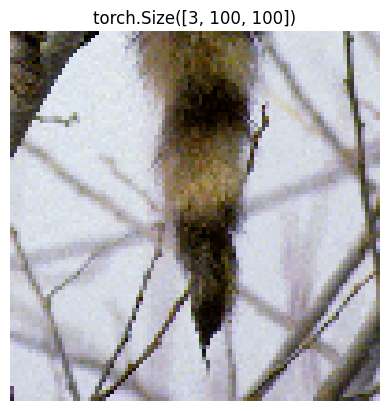

In [95]:
patches = image.unfold(1, 100, 100).unfold(2, 100, 100).reshape(3, -1, 100, 100)
patches = patches.permute(1, 0, 2, 3)

for i in range(9):
    sub_img = patches[i].squeeze()
    plt.imshow(to_pil_image(sub_img))
    plt.title(sub_img.shape)
    plt.axis(False)
    plt.show()

In [96]:
patches[0]

tensor([[[218, 218, 221,  ..., 220, 209, 220],
         [212, 219, 226,  ..., 221, 218, 224],
         [216, 226, 218,  ..., 216, 223, 224],
         ...,
         [159, 195, 205,  ..., 133, 125, 121],
         [148, 180, 205,  ..., 141, 115,  93],
         [153, 184, 203,  ..., 120, 108,  91]],

        [[221, 228, 228,  ..., 229, 217, 229],
         [217, 223, 234,  ..., 231, 228, 233],
         [217, 236, 225,  ..., 225, 229, 233],
         ...,
         [159, 195, 206,  ..., 130, 110, 114],
         [146, 187, 204,  ..., 129, 113,  83],
         [151, 189, 200,  ..., 117, 108,  74]],

        [[232, 231, 233,  ..., 241, 224, 225],
         [229, 222, 245,  ..., 233, 242, 242],
         [235, 245, 237,  ..., 225, 244, 240],
         ...,
         [155, 195, 202,  ..., 137, 107,  92],
         [155, 179, 206,  ..., 138, 115,  80],
         [139, 188, 206,  ..., 109,  89,  69]]], dtype=torch.uint8)

In [98]:
patches = image.unfold(1, 100, 100).unfold(2, 100, 100).reshape(3, -1, 100, 100)
patches = patches.permute(1, 0, 2, 3)
patches_embedding = patches.reshape(patches.shape[0], -1)
print(patches_embedding.shape)

torch.Size([9, 30000])


In [99]:
patches_embedding[0]

tensor([218, 218, 221,  ..., 109,  89,  69], dtype=torch.uint8)

In [115]:
class PatchEmbedding():
    def __init__(self, patch_size=100): 
        self.patch_size = patch_size
    
    def __call__(self, x):
        batch_size, channel, height, width = x.shape
        num_patches_height = height / self.patch_size
        num_patches_width = width / self.patch_size
        num_patches = int(num_patches_height * num_patches_width)
        
        patches = x.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size) # B C H W -> B C NPH NPW P P
        patches = patches.reshape(batch_size, channel, num_patches, self.patch_size, self.patch_size) # B C NPH NPW P P -> B C NP P P
        patches = patches.permute(0, 2, 1, 3, 4)  # B C NP P P -> B NP C P P
        patches_embedding = patches.reshape(batch_size, num_patches, -1) # B NP C P P -> B NP C*P*P
        
        return patches_embedding

In [110]:
# class PatchEmbeddingConv2d(nn.Module):
#     def __init__(self, image_size=300, patch_size=100, embedding_dim=768):  
#         super().__init__()
#         self.patch = nn.Conv2d(3, embedding_dim, kernel_size=patch_size, stride=patch_size, padding=0)
    
#     def forward(self, x):
#         x = self.patch(x)
#         x = x.flatten(2).transpose(1, 2)            
#         return x

In [119]:
patch_embed = PatchEmbedding()

torch.manual_seed(42)
x = torch.randint(255, (4, 3, 300, 300))
check_in = x[0, :, :100, :100].reshape(1, -1)
x = patch_embed(x)
check_out = x[0, 0]

print(check_in)
print(check_out)
print(torch.sum(check_in == check_out))

tensor([[132, 167, 181,  ..., 135, 162,  27]])
tensor([132, 167, 181,  ..., 135, 162,  27])
tensor(30000)
